In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("cleaned_data.csv")
label_encoder = LabelEncoder()
data['Delayed'] = label_encoder.fit_transform(data['Delayed'])
X = data.drop('Delayed', axis=1).select_dtypes(include=['number']).values
y = data['Delayed'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5894/5894 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9474 - loss: 0.1245 - val_accuracy: 0.9991 - val_loss: 0.0050
Epoch 2/20
5894/5894 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9955 - loss: 0.0121 - val_accuracy: 0.9975 - val_loss: 0.0057
Epoch 3/20
5894/5894 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.9971 - loss: 0.0080 - val_accuracy: 0.9975 - val_loss: 0.0063
Epoch 4/20
5894/5894 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9975 - loss: 0.0068 - val_accuracy: 0.9999 - val_loss: 0.0014
Epoch 5/20
5894/5894 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9979 - loss: 0.0062 - val_accuracy: 0.9999 - val_loss: 5.2793e-04
Epoch 6/20
5894/5894 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9981 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 3.4439e-04
Epoch 7/20
5894/5894 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9987 - loss: 0.0041 - val_accuracy: 0.9993 - val_loss: 0.0019
Epoch 8/20
5894/5894 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9985 - loss: 0.00

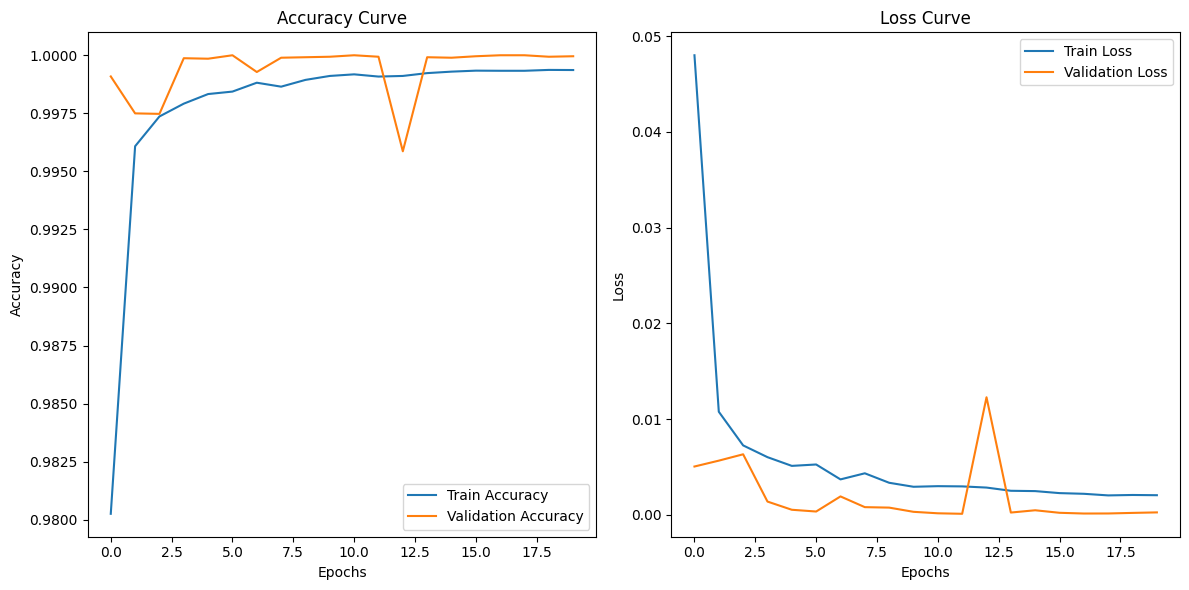

In [3]:
# Accuracy and Loss Curves
plt.figure(figsize=(12, 6))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

3158/3158 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


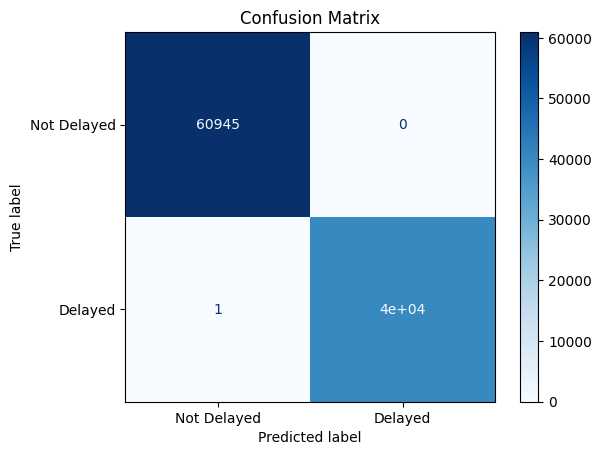

Classification Report:
               precision    recall  f1-score   support

 Not Delayed       1.00      1.00      1.00     60945
     Delayed       1.00      1.00      1.00     40088

    accuracy                           1.00    101033
   macro avg       1.00      1.00      1.00    101033
weighted avg       1.00      1.00      1.00    101033



In [4]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Delayed', 'Delayed'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, y_pred, target_names=['Not Delayed', 'Delayed'])
print("Classification Report:\n", report)
